In [215]:
import pandas as pd
import geopandas as gpd
import importlib
import numpy as np
import matplotlib.pyplot as plt

from itertools import repeat

from diagnostic import analyses, report#, simulparser


In [216]:
# importlib.reload(latex_string)
importlib.reload(analyses)
importlib.reload(report)

<module 'diagnostic.report' from '/home/ebobrow/Github/simul_diagnostic/src/diagnostic/report.py'>

In [217]:
matsim_output_path = ''
loop_detector_counts = ''

In [218]:
if matsim_output_path and loop_detector_counts:
    simulated = simulparser.MATSimParser(matsim_output_path)
    observed = pd.read_csv(loop_detector_counts)
else:
    simulated = pd.DataFrame.from_dict({
        'link_id' : [i for i in range(0, 10)],
        'count' : [i for i in range(10, 101, 10)],
        'time' : [i for i in repeat(1, 10)],
        'type' : [i for i in repeat('entered_link', 10)]
    })
    observed = pd.DataFrame.from_dict({
        'link_id' : [i for i in range(0, 10)],
        'count' : [i for i in range(11, 102, 10)],
        'time' : [i for i in repeat(1, 10)],
        'type' : [i for i in repeat('entered_link', 10)]
    })
    # simulated = pd.read_csv('./test_data/simulated.csv')
    # observed = pd.read_csv('./test_data/observed.csv')

In [219]:
zurich_shp: gpd.GeoDataFrame = gpd.read_file("test_data/zurich_shp/geoz.sv_str_lin.shp")
zurich_shp.head()

,str_nr,str_name,str_st_bez,str_von,str_bis,str_kreis,str_planqu,str_vb,str_up_kan,snb_str_nr,snb_erlaeu,snb_tafelt,snb_tafe00,objectid,geometry
0,1771,Schoeckstrasse,gültig,Utoquai,Theaterstrasse 14,1,O 14,AA,2408,1771.0,Othmar Schoeck (1886-1957): Komponist und Musi...,NaN,NaN,5968.0,"LINESTRING (2683569.818 1246755.725, 2683586.3..."
1,53,Altweg,gültig,Letzigraben 231,In der Ey 60,9,J 13,AR,2406,53.0,Verkürzte Form des Flurnamens «im alten Weg» (...,NaN,NaN,5969.0,"LINESTRING (2679645.779 1247242.273, 2679618.3..."
2,223,Binderweg,gültig,Zelghalde 44,Hürststrasse 56,11,M 8,AF,2107,223.0,Gottfried Binder (1872-1934): Letzter Gemeinde...,NaN,NaN,5970.0,"LINESTRING (2682314.741 1252068.947, 2682312.7..."
3,1754,Schlatterweg,gültig,Schaffhauserstrasse 91,Im Birkenhof,6,N 10,UN,2207,1754.0,Leonhard Schlatter: Erster namentlich bekannte...,Leonhard Schlatter\r\nErster namentlich bekann...,NaN,5971.0,"LINESTRING (2683097.981 1249831.463, 2683059.2..."
4,2223,Wunderlistrasse,gültig,Lehenstrasse 43,Rebbergstrasse 1,10,L/M 10,WP,2207,2223.0,Paul Wunderli (1852-1885): Kaufmann von Meilen...,Paul Wunderli (1852-1885)\r\nEigentümer des Wa...,NaN,5972.0,"LINESTRING (2681928.804 1250113.515, 2681929.5..."


In [220]:
zurich_shp = zurich_shp[["str_nr", "geometry"]]#[zurich_shp["str_nr"] < 100]
zurich_shp.head()

,str_nr,geometry
0,1771,"LINESTRING (2683569.818 1246755.725, 2683586.3..."
1,53,"LINESTRING (2679645.779 1247242.273, 2679618.3..."
2,223,"LINESTRING (2682314.741 1252068.947, 2682312.7..."
3,1754,"LINESTRING (2683097.981 1249831.463, 2683059.2..."
4,2223,"LINESTRING (2681928.804 1250113.515, 2681929.5..."


In [221]:
zurich_shp.rename(columns={"str_nr" : "link_id"}, inplace=True)
zurich_shp["count"] = np.arange(len(zurich_shp))
zurich_shp.sort_values(by="link_id", axis=0)
zurich_shp['time'] = 1
zurich_shp['type'] = 'entered_link'
zurich_shp

,link_id,geometry,count,time,type
0,1771,"LINESTRING (2683569.818 1246755.725, 2683586.3...",0,1,entered_link
1,53,"LINESTRING (2679645.779 1247242.273, 2679618.3...",1,1,entered_link
2,223,"LINESTRING (2682314.741 1252068.947, 2682312.7...",2,1,entered_link
3,1754,"LINESTRING (2683097.981 1249831.463, 2683059.2...",3,1,entered_link
4,2223,"LINESTRING (2681928.804 1250113.515, 2681929.5...",4,1,entered_link
...,...,...,...,...,...
2519,801,"LINESTRING (2686576.606 1248037.418, 2686577.6...",2519,1,entered_link
2520,1593,"LINESTRING (2682425.316 1243795.915, 2682426.6...",2520,1,entered_link
2521,414,"LINESTRING (2683731.900 1246560.888, 2683759.8...",2521,1,entered_link
2522,2185,"LINESTRING (2683195.824 1247411.220, 2683157.5...",2522,1,entered_link


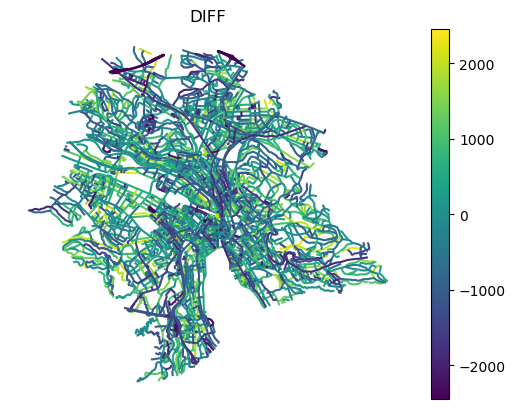

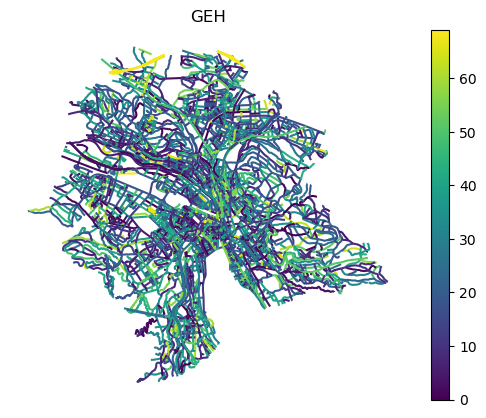

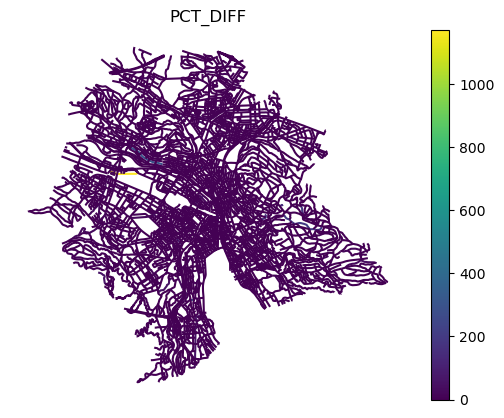

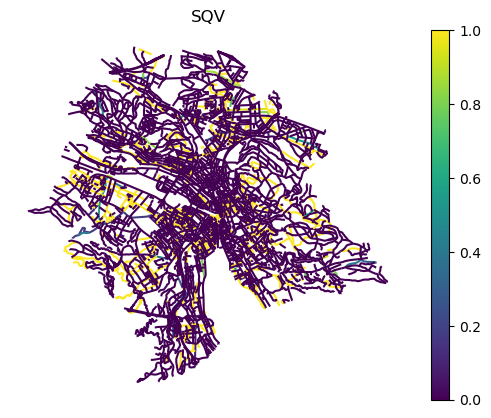

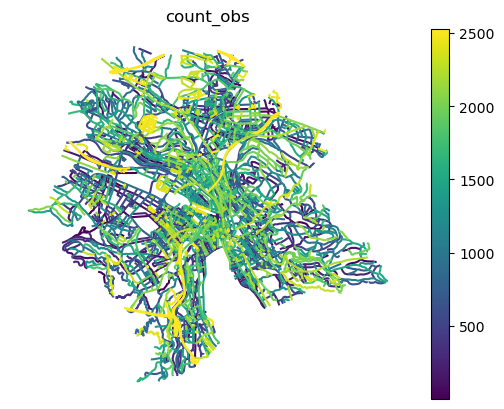

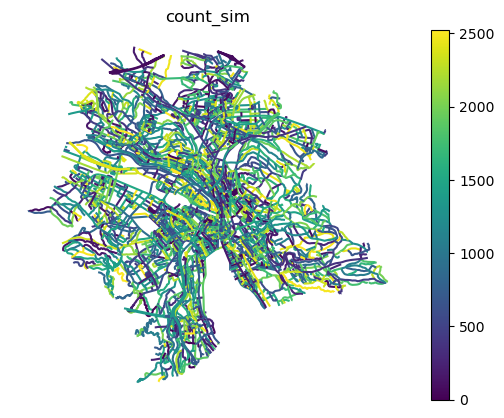

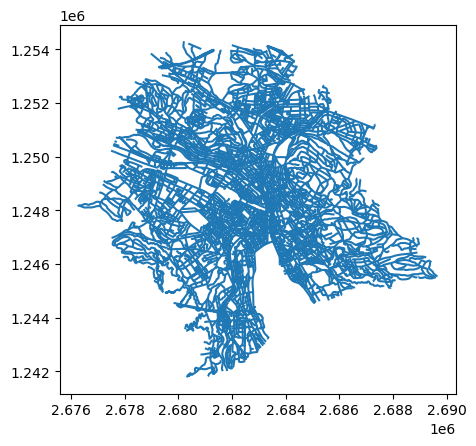

In [222]:
plt.ion()
gpd.GeoDataFrame(zurich_shp[['geometry', 'link_id']]).plot()
plt.ioff()

In [223]:
observed = pd.DataFrame({"count" : list(range(2, len(zurich_shp)+1)),
"link_id" : list(range(1,len(zurich_shp)))})
observed['time'] = 1
observed['type'] = 'entered_link'

In [224]:
cc = analyses.CountComparison()
cs = analyses.CountSummaryStats()
cv = analyses.CountVisualization()
em = analyses.EarthMoverDistance()
analyses_list = [cc, cs, cv, em]

add = {
    cs : cc,
    cv : cc
}

INFO:root:<class 'diagnostic.analyses.CountComparison'>
INFO:root:<enum 'CountComparisonOptions'>
INFO:root:<class 'diagnostic.analyses.CountSummaryStats'>
INFO:root:<enum 'CountSummaryStatsOptions'>
INFO:root:<class 'diagnostic.analyses.CountVisualization'>
INFO:root:<enum 'CountComparisonOptions'>
INFO:root:<class 'diagnostic.analyses.EarthMoverDistance'>
INFO:root:<enum 'EMDOptions'>


In [225]:
observed

,count,link_id,time,type
0,2,1,1,entered_link
1,3,2,1,entered_link
2,4,3,1,entered_link
3,5,4,1,entered_link
4,6,5,1,entered_link
...,...,...,...,...
2518,2520,2519,1,entered_link
2519,2521,2520,1,entered_link
2520,2522,2521,1,entered_link
2521,2523,2522,1,entered_link


In [226]:
zurich_shp

,link_id,geometry,count,time,type
0,1771,"LINESTRING (2683569.818 1246755.725, 2683586.3...",0,1,entered_link
1,53,"LINESTRING (2679645.779 1247242.273, 2679618.3...",1,1,entered_link
2,223,"LINESTRING (2682314.741 1252068.947, 2682312.7...",2,1,entered_link
3,1754,"LINESTRING (2683097.981 1249831.463, 2683059.2...",3,1,entered_link
4,2223,"LINESTRING (2681928.804 1250113.515, 2681929.5...",4,1,entered_link
...,...,...,...,...,...
2519,801,"LINESTRING (2686576.606 1248037.418, 2686577.6...",2519,1,entered_link
2520,1593,"LINESTRING (2682425.316 1243795.915, 2682426.6...",2520,1,entered_link
2521,414,"LINESTRING (2683731.900 1246560.888, 2683759.8...",2521,1,entered_link
2522,2185,"LINESTRING (2683195.824 1247411.220, 2683157.5...",2522,1,entered_link


In [227]:
# report.CreateComparisonDF()._emd_grouping(zurich_shp)
# report.CreateComparisonDF().emd(zurich_shp, observed)
# report.CreateComparisonDF().emd(zurich_shp, observed)

In [228]:
link_count_report = report.Report('Link count report', zurich_shp, observed, analyses_list, analysis_dependence_dict=add)

[<diagnostic.analyses.CountComparison object at 0x7f7e45261d90>, <diagnostic.analyses.CountSummaryStats object at 0x7f7e46986190>, <diagnostic.analyses.CountVisualization object at 0x7f7e460908d0>, <diagnostic.analyses.EarthMoverDistance object at 0x7f7e470cdfd0>]
Analysis:<diagnostic.analyses.CountComparison object at 0x7f7e45261d90>
Analysis:<diagnostic.analyses.CountSummaryStats object at 0x7f7e46986190>
Analysis:<diagnostic.analyses.CountVisualization object at 0x7f7e460908d0>
DIFF


/home/ebobrow/anaconda3/envs/simul/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


GEH
PCT_DIFF
SQV
count_obs
count_sim
Analysis:<diagnostic.analyses.EarthMoverDistance object at 0x7f7e470cdfd0>
Comp:
      link_id  time  count_sim  count_obs
0           1     1     2343.0        2.0
1           2     1     1343.0        3.0
2           3     1     1333.0        4.0
3           4     1     2394.0        5.0
4           5     1     1015.0        6.0
...       ...   ...        ...        ...
2519     2543     1     1314.0        0.0
2520     2544     1     2071.0        0.0
2521     2545     1     1392.0        0.0
2522     2546     1     2124.0        0.0
2523     2547     1      704.0        0.0

[2547 rows x 4 columns]
DF:
link_id
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2543    0.0
2544    0.0
2545    0.0
2546    0.0
2547    0.0
Name: EMD15, Length: 2547, dtype: float64
DF:
link_id
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2543    0.0
2544    0.0
2545    0.0
2546    0.0
2547    0.0
Name: EMD30, Length: 25

In [229]:
result = cc.result.copy()

In [230]:
# link_count_report.to_latex('latex_output/test', latex_dir=PurePath(Path.cwd(), 'latex_output'))
link_count_report.to_latex('latex_output/test')

Escape chars: ['_']
Escape chars: ['_']
Paths: [PurePosixPath('/tmp/tmp8l_mnl52/DIFF.pdf'), PurePosixPath('/tmp/tmp8l_mnl52/GEH.pdf'), PurePosixPath('/tmp/tmp8l_mnl52/PCT_DIFF.pdf'), PurePosixPath('/tmp/tmp8l_mnl52/SQV.pdf'), PurePosixPath('/tmp/tmp8l_mnl52/count_obs.pdf'), PurePosixPath('/tmp/tmp8l_mnl52/count_sim.pdf')]
Data: [Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmp8l_mnl52/DIFF.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmp8l_mnl52/GEH.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmp8l_mnl52/PCT_DIFF.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmp8l_mnl52/SQV.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmp8l_mnl52/count_obs.pdf)), Options('width=\\textwidth

# Earth mover's distance test

In [231]:
sim = pd.read_csv('./test_data/test.csv')
sim['count'] = 1

obs = sim.copy()
obs = pd.concat([obs, obs])
sim

,time,type,link_id,vehicle,count
0,1.0,left link,890140,201740008398585,1
1,1.0,entered link,894435,201740008398585,1
2,1.0,left link,282946,201740012297026,1
3,1.0,entered link,282947,201740012297026,1
4,1.0,left link,493161,201740008136292,1
...,...,...,...,...,...
841,226.0,left link,1024369,201740010451177,1
842,226.0,entered link,237259,201740012297026,1
843,226.0,entered link,609172,201740010451177,1
844,227.0,left link,72608,201740007977263,1


In [ ]:
report.CreateComparisonDF.emd(sim, obs)

In [ ]:
emd = analyses.EarthMoverDistance()
emd.generate_analysis(report.CreateComparisonDF.emd(sim, obs))

INFO:root:<class 'diagnostic.analyses.EarthMoverDistance'>
INFO:root:<enum 'EMDOptions'>


Comp:
     link_id   time  count_sim  count_obs
0        595  182.0          1          2
1        595  201.0          1          2
2      13585  109.0          1          2
3      13585  118.0          1          2
4      13587   97.0          1          2
..       ...    ...        ...        ...
839  1062326  124.0          1          2
840  1062326  130.0          1          2
843  1074723  212.0          1          2
844  1074725  201.0          1          2
845  1074725  212.0          1          2

[846 rows x 4 columns]
DF:
link_id
595        0.0
13585      0.0
13587      0.0
20033      0.0
20041      0.0
          ... 
1062017    0.0
1062112    0.0
1062326    0.0
1074723    0.0
1074725    0.0
Name: EMD15, Length: 418, dtype: float64
DF:
link_id
595        0.0
13585      0.0
13587      0.0
20033      0.0
20041      0.0
          ... 
1062017    0.0
1062112    0.0
1062326    0.0
1074723    0.0
1074725    0.0
Name: EMD30, Length: 418, dtype: float64
DF:
link_id
595        0.0
135

In [ ]:
emd.result

,EMD15,EMD30,EMD60
link_id,,,
595,0.0,0.0,0.0
13585,0.0,0.0,0.0
13587,0.0,0.0,0.0
20033,0.0,0.0,0.0
20041,0.0,0.0,0.0
...,...,...,...
1062017,0.0,0.0,0.0
1062112,0.0,0.0,0.0
1062326,0.0,0.0,0.0


In [ ]:
from scipy.stats import wasserstein_distance

a = {(1, 2) : 5, (2, 3) : 10}
b = {(1, 2) : 3, (2, 3) : 6}
# a = [1, 2]
result['link_count_sim'] = pd.Series(a for x in range(len(result) + 1))
result['link_count_obs'] = pd.Series(b for x in range(len(result) + 1))

In [ ]:
result

,geometry,count_sim,count_obs,DIFF,PCT_DIFF,SQV,GEH,link_count_sim,link_count_obs
link_id,,,,,,,,,
1,"LINESTRING (2680342.974 1249622.810, 2680313.4...",2343.0,2,2341.0,1170.500000,0.000604,68.366758,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}"
2,"LINESTRING (2682744.049 1249785.661, 2682692.9...",1343.0,3,1340.0,446.666667,0.001291,51.653204,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}"
3,"LINESTRING (2682439.479 1244881.638, 2682420.8...",1333.0,4,1329.0,332.250000,0.001503,51.401320,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}"
4,"LINESTRING (2683512.517 1251292.411, 2683516.0...",2394.0,5,2389.0,477.800000,0.000935,68.978862,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}"
5,"LINESTRING (2684947.593 1247872.278, 2684971.5...",1015.0,6,1009.0,168.166667,0.002422,44.657385,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}"
...,...,...,...,...,...,...,...,...,...
2519,"MULTILINESTRING ((2681947.835 1243505.638, 268...",715.0,2520,-1805.0,-0.716270,0.000000,44.880229,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}"
2520,"MULTILINESTRING ((2682005.213 1246959.419, 268...",1345.0,2521,-1176.0,-0.466482,0.000000,26.748005,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}"
2521,"MULTILINESTRING ((2681335.749 1244275.905, 268...",1364.0,2522,-1158.0,-0.459159,0.000000,26.270731,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}"


In [ ]:
def integral(row, col):
        return sum(((key[1] - key[0]) * count for (key, count) in row[col].items()))
        pass

def vector_wasser(row):
    return wasserstein_distance(
        u_values=[(start + end)/2 for start, end in row['link_count_sim'].keys()],
        v_values=[(start + end)/2 for start, end in row['link_count_obs'].keys()],
        u_weights=[count/integral(row, 'link_count_sim') for count in row['link_count_sim'].values()],
        v_weights=[count/integral(row, 'link_count_obs') for count in row['link_count_obs'].values()]
        )

In [ ]:
result['wass_dist'] = result.apply(vector_wasser, axis=1)

In [ ]:
result

,geometry,count_sim,count_obs,DIFF,PCT_DIFF,SQV,GEH,link_count_sim,link_count_obs,wass_dist
link_id,,,,,,,,,,
1,"LINESTRING (2680342.974 1249622.810, 2680313.4...",2343.0,2,2341.0,1170.500000,0.000604,68.366758,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
2,"LINESTRING (2682744.049 1249785.661, 2682692.9...",1343.0,3,1340.0,446.666667,0.001291,51.653204,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
3,"LINESTRING (2682439.479 1244881.638, 2682420.8...",1333.0,4,1329.0,332.250000,0.001503,51.401320,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
4,"LINESTRING (2683512.517 1251292.411, 2683516.0...",2394.0,5,2389.0,477.800000,0.000935,68.978862,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
5,"LINESTRING (2684947.593 1247872.278, 2684971.5...",1015.0,6,1009.0,168.166667,0.002422,44.657385,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
...,...,...,...,...,...,...,...,...,...,...
2519,"MULTILINESTRING ((2681947.835 1243505.638, 268...",715.0,2520,-1805.0,-0.716270,0.000000,44.880229,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
2520,"MULTILINESTRING ((2682005.213 1246959.419, 268...",1345.0,2521,-1176.0,-0.466482,0.000000,26.748005,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0
2521,"MULTILINESTRING ((2681335.749 1244275.905, 268...",1364.0,2522,-1158.0,-0.459159,0.000000,26.270731,"{(1, 2): 5, (2, 3): 10}","{(1, 2): 3, (2, 3): 6}",0.0


# Parser test

In [ ]:
events = pd.read_csv('test_data/test.csv')
events

,time,type,link_id,vehicle
0,1.0,left link,890140,201740008398585
1,1.0,entered link,894435,201740008398585
2,1.0,left link,282946,201740012297026
3,1.0,entered link,282947,201740012297026
4,1.0,left link,493161,201740008136292
...,...,...,...,...
841,226.0,left link,1024369,201740010451177
842,226.0,entered link,237259,201740012297026
843,226.0,entered link,609172,201740010451177
844,227.0,left link,72608,201740007977263


In [ ]:
from functools import partial
from enum import Enum

In [ ]:
class EMDOptions(Enum):
    EMD15 = 15
    EMD30 = 30
    EMD60 = 60

    def __new__(cls, value):
        obj = object.__new__(cls)
        obj._value_ = partial(cls._emd_grouping, interval_duration=value)
        return obj

    @classmethod
    def _emd_grouping(cls, df: pd.DataFrame, interval_duration: float) -> pd.DataFrame:
        comp = df.copy()
        comp['interval'] = comp.apply(cls._interval, interval_duration=interval_duration, axis=1)
        comp = comp.groupby(['link_id', 'interval']).count().rename(columns={'time' : 'count'})
        print(comp)
        return comp

    @classmethod
    def _interval(cls, row, interval_duration: float) -> str:
        quotient = row['time']//interval_duration
        return f"[{quotient * interval_duration},{(quotient + 1) * interval_duration})"

In [ ]:
EMDOptions.EMD30

<EMDOptions.EMD30: functools.partial(<bound method EMDOptions._emd_grouping of <enum 'EMDOptions'>>, interval_duration=30)>